Cluster centers:
 [[5.82964313 2.76241776]
 [6.81386256 3.07019013]
 [4.9799666  3.35561879]]

Fuzzy Partition Coefficient (FPC): 0.7024761187331584


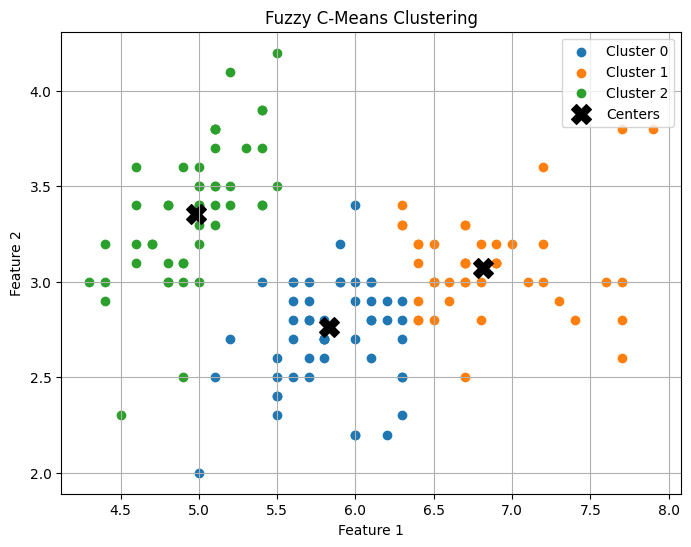

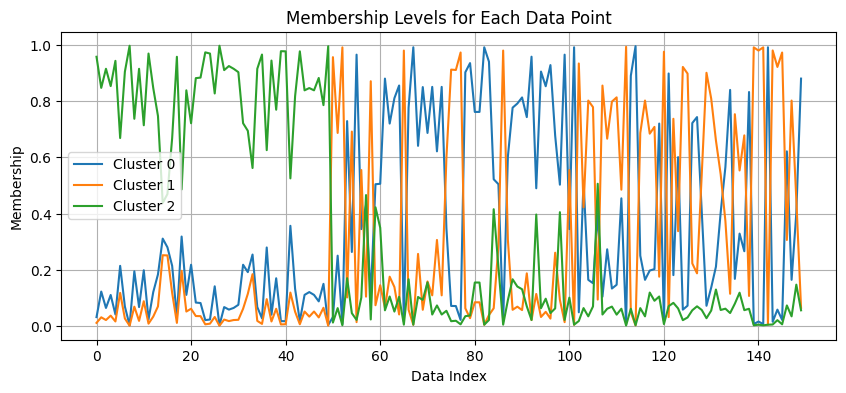

In [26]:
!pip install scikit-fuzzy matplotlib numpy pandas

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.datasets import load_iris

# ---------------- Load Dataset ----------------
iris = load_iris()
X = iris.data[:, :2]    # Taking 2 features for easy 2D visualization
X = X.T                 # FCM expects data in shape (features, samples)

# ---------------- Fuzzy C-Means Clustering ----------------
n_clusters = 3          # Number of clusters

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X,
    c=n_clusters,
    m=2.0,             # fuzziness factor
    error=0.005,
    maxiter=1000,
    init=None
)

# u = membership matrix (shape: clusters × samples)
cluster_labels = np.argmax(u, axis=0)

print("Cluster centers:\n", cntr)
print("\nFuzzy Partition Coefficient (FPC):", fpc)

# ---------------- Visualization ----------------
colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 6))

# Plot data points colored by highest membership
for i in range(n_clusters):
    plt.scatter(X[0, u[i] > 0.5], X[1, u[i] > 0.5],
                label=f"Cluster {i}")

# Plot cluster centers
plt.scatter(cntr[:, 0], cntr[:, 1], marker='X', s=200, c='black', label="Centers")

plt.title("Fuzzy C-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# ---------------- Membership Visualization ----------------
plt.figure(figsize=(10, 4))
for i in range(n_clusters):
    plt.plot(u[i], label=f"Cluster {i}")

plt.title("Membership Levels for Each Data Point")
plt.xlabel("Data Index")
plt.ylabel("Membership")
plt.legend()
plt.grid(True)
plt.show()